<a href="https://colab.research.google.com/github/nikitasharma1804/FruitNet/blob/main/CV_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
# pprevent annoying tensorflow warning
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import warnings
warnings.simplefilter("ignore")

In [ ]:
sdir=r'/content/drive/MyDrive/FruitNetDataset'
X = [] 
Y = []


In [ ]:
a = set()
for folder in os.listdir(sdir):#bad/good/mixed
  fol_path = sdir + r'/' + folder#fol_path=bad/good/mixed
  for fruit in os.listdir(fol_path):#fruit=apple,banan
    fr_path = fol_path + r'/' + fruit
    name = fruit
    if folder == 'Mixed Qualit_Fruits':
      name = fruit + '_mixed'
    for img in os.listdir(fr_path):#frpath=apple,banana
      img_path = fr_path + r'/' + img
      img = cv2.imread(img_path)
      img = cv2.resize(img, dsize=(64, 64))
      X.append(img)
      Y.append(name)
      a.add(name)

In [ ]:
encode = {}
decode = {}
for i, n in enumerate(a):
  encode[n] = i
  decode[i] = n

In [ ]:
target = []
for i in Y:
  target.append(encode[i])

y = np.asarray(target)
x = np.asarray(X)

In [ ]:
m = x.shape
m

(19544, 64, 64, 3)

In [ ]:
images = x.reshape(m[0], -1)
images.shape

(19544, 12288)

##**Custom CNN**

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x, y)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Conv2D(filters=72, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=18, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 32, validation_data = (X_val, Y_val))

Epoch 1/5
459/459 [==============================] - 63s 136ms/step - loss: 0.7723 - accuracy: 0.7567 - val_loss: 0.7490 - val_accuracy: 0.7788
Epoch 2/5
459/459 [==============================] - 59s 128ms/step - loss: 0.4303 - accuracy: 0.8671 - val_loss: 1.0298 - val_accuracy: 0.6543
Epoch 3/5
459/459 [==============================] - 57s 125ms/step - loss: 0.3169 - accuracy: 0.8991 - val_loss: 0.3439 - val_accuracy: 0.8979
Epoch 4/5
459/459 [==============================] - 57s 125ms/step - loss: 0.1987 - accuracy: 0.9358 - val_loss: 0.3418 - val_accuracy: 0.9032
Epoch 5/5
459/459 [==============================] - 57s 125ms/step - loss: 0.1605 - accuracy: 0.9458 - val_loss: 0.3872 - val_accuracy: 0.8874


In [ ]:
# Evaluating the model on test data
model.evaluate(X_val , Y_val)

153/153 [==============================] - 7s 43ms/step - loss: 0.3872 - accuracy: 0.8874


[0.38722628355026245, 0.8874334692955017]

In [ ]:
import matplotlib.pyplot as plt

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


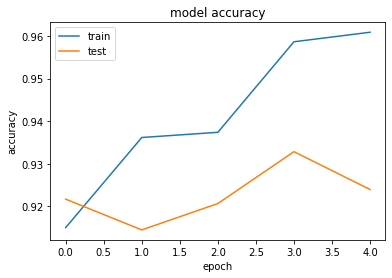

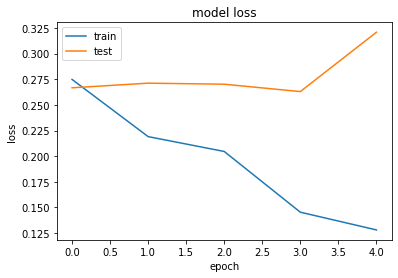

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_val, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       255
           1       0.61      0.68      0.64        34
           2       0.98      0.97      0.98      1506
           3       0.89      0.92      0.90       310
           4       0.77      0.64      0.70       289
           5       0.88      0.94      0.91       293
           6       0.82      0.71      0.76        65
           7       0.94      0.91      0.93       274
           8       0.83      0.65      0.73        23
           9       0.95      0.86      0.90       283
          10       0.75      0.47      0.58        38
          11       0.58      0.72      0.64        74
          12       0.89      0.93      0.91       284
          13       0.92      0.97      0.95       256
          14       0.86      0.95      0.90       290
          15       0.77      0.77      0.77        30
          16       0.82      0.88      0.85       276
  

ENd of custom cnn

##**KNN Model for the Dataset**

In [ ]:
pca = PCA(n_components = 120)
x_pca = pca.fit_transform(images)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_pca, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.score(X_test, Y_test)

0.9506267587618317

In [ ]:

y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       216
           1       0.97      0.96      0.96       209
           2       0.88      0.85      0.87       216
           3       0.99      0.97      0.98       230
           4       0.89      0.86      0.88        66
           5       0.98      0.99      0.98       242
           6       0.94      1.00      0.97      1195
           7       0.96      0.99      0.97       242
           8       0.87      0.72      0.79        18
           9       0.83      0.86      0.85        29
          10       0.91      0.95      0.93        21
          11       0.97      0.65      0.78       249
          12       0.89      0.95      0.92        59
          13       1.00      0.89      0.94        28
          14       0.94      0.99      0.97       223
          15       0.98      0.97      0.98       203
          16       0.97      0.98      0.97       238
          17       0.95    

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[ 210    0    0    1    0    0    0    5    0    0    0    0    0    0
     0    0    0    0]
 [   0  200    1    0    0    0    1    0    0    0    0    1    2    0
     3    0    0    1]
 [   2    3  184    0    1    0   13    1    0    1    0    3    1    0
     3    0    3    1]
 [   0    0    1  224    0    0    1    0    0    0    0    0    0    0
     2    1    0    1]
 [   0    0    2    0   57    0    4    0    0    1    0    0    0    0
     0    0    2    0]
 [   0    0    1    0    0  239    0    1    0    0    0    0    0    0
     1    0    0    0]
 [   0    0    0    1    0    2 1192    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  240    2    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    4    0   13    0    1    0    0    0
     0    0    0    0]
 [   0    1    0    0    0    0    1    0    0   25    0    0    1    0
     1    0    0    0]
 [   0    0    0    0    0    0    1    0    0    

##**NN Model for the Dataset**

In [ ]:
# Splitting dataset into 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15635, 64, 64, 3)
(15635,)
(3909, 64, 64, 3)
(3909,)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from tensorflow.keras import layers,models
from keras.layers import Dense

# split into input (X) and output (y) variables

# define the keras model

'''
model = Sequential()
model.add(Dense(12, input_shape=(32,32,3), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))'''
model=models.Sequential([
        layers.Flatten(input_shape=(64,64,3)),
        layers.Dense(10, activation='relu'),
        layers.Dense(12, activation='relu'),
        layers.Dense(18, activation='softmax')    
    ])
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10)
# evaluate the keras model
# _, accuracy = model.evaluate(train_data, train_label)
# print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
489/489 [==============================] - 3s 5ms/step - loss: 2.3815 - accuracy: 0.3073
Epoch 2/10
489/489 [==============================] - 3s 5ms/step - loss: 1.8743 - accuracy: 0.4253
Epoch 3/10
489/489 [==============================] - 3s 5ms/step - loss: 1.4840 - accuracy: 0.5496
Epoch 4/10
489/489 [==============================] - 3s 5ms/step - loss: 1.3092 - accuracy: 0.5964
Epoch 5/10
489/489 [==============================] - 3s 5ms/step - loss: 1.2188 - accuracy: 0.6161
Epoch 6/10
489/489 [==============================] - 2s 5ms/step - loss: 1.1634 - accuracy: 0.6351
Epoch 7/10
489/489 [==============================] - 3s 5ms/step - loss: 1.1283 - accuracy: 0.6445
Epoch 8/10
489/489 [==============================] - 3s 5ms/step - loss: 1.0915 - accuracy: 0.6556
Epoch 9/10
489/489 [==============================] - 3s 6ms/step - loss: 1.0304 - accuracy: 0.6762
Epoch 10/10
489/489 [==============================] - 3s 5ms/step - loss: 1.0221 - accuracy: 0.6755

In [ ]:
model.evaluate(X_test , y_test)

123/123 [==============================] - 1s 3ms/step - loss: 0.9994 - accuracy: 0.6969


[0.9993882179260254, 0.6968533992767334]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


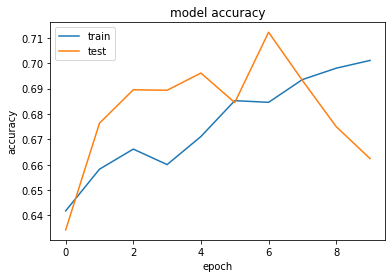

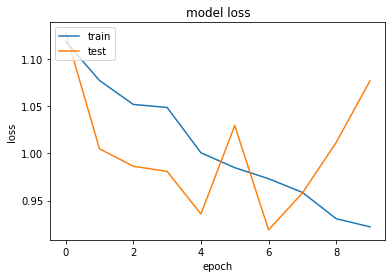

In [ ]:
import matplotlib.pyplot as plt

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=10, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.74      0.69       235
           1       0.21      0.14      0.17        22
           2       0.44      0.69      0.54       240
           3       0.59      0.54      0.56       231
           4       0.24      0.24      0.24       199
           5       0.82      0.97      0.89      1196
           6       0.67      0.09      0.15        23
           7       0.96      0.68      0.80       227
           8       0.78      0.71      0.74       219
           9       0.57      0.61      0.59       219
          10       0.39      0.34      0.36       229
          11       0.00      0.00      0.00        39
          12       0.00      0.00      0.00        26
          13       1.00      0.07      0.14        54
          14       1.00      0.02      0.04        56
          15       0.53      0.61      0.56       208
          16       0.75      0.79      0.77       261
  

In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

def cnn_model_fn():
      input_layers = (64,64,3) 
      model = tf.keras.models.Sequential() 

    # first Convolutional Layer
      model.add(layers.Conv2D(
      input_shape=input_layers,
      filters=14,
      kernel_size=[3, 3],
      padding="same",
      activation=tf.nn.relu))
    
      # first Pooling Layer 
      model.add(layers.MaxPooling2D(input_shape=input_layers, pool_size=[2, 2], strides=2))

      # second convolutional layer
      model.add(layers.Conv2D(input_shape=input_layers,
      filters=36,
      kernel_size=[3, 3],
      padding="same",
      activation=tf.nn.relu))

      # second pooling layer
      model.add(layers.MaxPooling2D(input_shape=input_layers, pool_size=[2, 2], strides=2))
    
      model.add(layers.Flatten())
      model.add(layers.Dense(
        units = 2000,
        activation = tf.nn.relu
        ))
      
      model.add(layers.Dense(
        units = 1000,
        activation = tf.nn.relu
        ))
      
      return model

In [ ]:
cnn = cnn_model_fn()
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model = cnn.fit(X_train, y_train, validation_data = (X_test, y_test),epochs=10)

Epoch 1/10
489/489 [==============================] - 145s 295ms/step - loss: 15.9324 - accuracy: 0.0574 - val_loss: 15.9570 - val_accuracy: 0.0614
Epoch 2/10
489/489 [==============================] - 148s 303ms/step - loss: 15.9514 - accuracy: 0.0576 - val_loss: 15.9570 - val_accuracy: 0.0614
Epoch 3/10
489/489 [==============================] - 146s 298ms/step - loss: 15.9514 - accuracy: 0.0576 - val_loss: 15.9570 - val_accuracy: 0.0614
Epoch 4/10
 87/489 [====>.........................] - ETA: 1:55 - loss: 15.8041 - accuracy: 0.0607

In [ ]:
# Evaluating the model on test data
cnn.evaluate(X_test , y_test)

In [ ]:
# Function for plotting learning of the model

import matplotlib.pyplot as plt
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

In [ ]:
plot_history(model)

 **Transfer Learning**

In [ ]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [ ]:
sdir=r'/content/drive/MyDrive/FruitNetDataset'
bad_path=r'/content/drive/MyDrive/FruitNetDataset/Bad Quality_Fruits'
good_path=r'/content/drive/MyDrive/FruitNetDataset/Good Quality_Fruits'
mixed_path=r'/content/drive/MyDrive/FruitNetDataset/Mixed Qualit_Fruits'
filepaths=[]
labels=[]
ht=0
wt=0
samples=0
sample_count=20
for quality in [bad_path, good_path, mixed_path]:    
    fruit_list=os.listdir(quality)
    for fruit in fruit_list:
        fruit_path=os.path.join(quality, fruit)
        img_list=os.listdir(fruit_path)
        for i, img in enumerate(img_list):
            img_path=os.path.join(fruit_path, img)
            if i < sample_count:
                img=plt.imread(img_path)               
                ht += img.shape[0]
                wt += img.shape[1]
                samples +=1
            filepaths.append(img_path)
            if quality == mixed_path:
                labels.append(fruit + '_mixed')
            else:
                labels.append(fruit)
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
# split df into a train_df a valid_df and a test_df
trsplit=.9
vsplit=.05
dsplit =vsplit/(1-trsplit)
strat=df['labels']
train_df, dummy_df=train_test_split(df, train_size=.9, shuffle=True, random_state=123, stratify=strat)
strat=dummy_df['labels']
test_df, valid_df=train_test_split(dummy_df, train_size=dsplit, shuffle=True, random_state=123, stratify=strat)
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
classes=list(train_df['labels'].unique())
class_count = len(classes)
groups=df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
for label in train_df['labels'].unique():
      group=groups.get_group(label)
      samples=len(group)
      print('{0:^30s} {1:^13s}'.format(label, str(len(group))))
wave=wt/samples
have=ht/samples
aspect_ratio= have/wave
print ('Average Image Height: ' ,have, '  Average Image Width: ', wave, '  Aspect ratio: ', aspect_ratio)

In [ ]:
def trim (df, max_size, min_size, column):
    df=df.copy()
    original_class_count= len(list(df[column].unique()))
    print ('Original Number of classes in dataframe: ', original_class_count)
    sample_list=[] 
    groups=df.groupby(column)
    for label in df[column].unique():        
        group=groups.get_group(label)
        sample_count=len(group)         
        if sample_count> max_size :
            strat=group[column]
            samples,_=train_test_split(group, train_size=max_size, shuffle=True, random_state=123, stratify=strat)            
            sample_list.append(samples)
        elif sample_count>= min_size:
            sample_list.append(group)
    df=pd.concat(sample_list, axis=0).reset_index(drop=True)
    final_class_count= len(list(df[column].unique())) 
    if final_class_count != original_class_count:
        print ('*** WARNING***  dataframe has a reduced number of classes' )
    balance=list(df[column].value_counts())
    print (balance)
    return df

In [ ]:
max_samples=200
min_samples=0
column = 'labels'
train_df=trim(train_df, max_samples, min_samples, column)

In [ ]:
def balance(train_df,max_samples, min_samples, column, working_dir, image_size):
    train_df=train_df.copy()
    train_df=trim (train_df, max_samples, min_samples, column)    
    # make directories to store augmented images
    aug_dir=os.path.join(working_dir, 'aug')
    if os.path.isdir(aug_dir):
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)
    for label in train_df['labels'].unique():    
        dir_path=os.path.join(aug_dir,label)    
        os.mkdir(dir_path)
    # create and store the augmented images  
    total=0
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2)
    groups=train_df.groupby('labels') # group by class
    for label in train_df['labels'].unique():  # for every class               
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
        sample_count=len(group)   # determine how many samples there are in this class  
        if sample_count< max_samples: # if the class has less than target number of images
            aug_img_count=0
            delta=max_samples-sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images    
            aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=image_size,
                                            class_mode=None, batch_size=1, shuffle=False, 
                                            save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                            save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)            
                aug_img_count += len(images)
            total +=aug_img_count
    print('Total Augmented images created= ', total)
    # create aug_df and merge with train_df to create composite training set ndf
    if total>0:
        aug_fpaths=[]
        aug_labels=[]
        classlist=os.listdir(aug_dir)
        for klass in classlist:
            classpath=os.path.join(aug_dir, klass)     
            flist=os.listdir(classpath)    
            for f in flist:        
                fpath=os.path.join(classpath,f)         
                aug_fpaths.append(fpath)
                aug_labels.append(klass)
        Fseries=pd.Series(aug_fpaths, name='filepaths')
        Lseries=pd.Series(aug_labels, name='labels')
        aug_df=pd.concat([Fseries, Lseries], axis=1)
        train_df=pd.concat([train_df,aug_df], axis=0).reset_index(drop=True)
   
    print (list(train_df['labels'].value_counts()) )
    return train_df 

In [ ]:
working_dir=r'./'
img_size=(224,224)
train_df=balance(train_df, max_samples, min_samples, column, working_dir, img_size)

In [ ]:
batch_size=20 # We will use and EfficientetB3 model, with image size of (300,233) this size should not cause resource error
trgen=ImageDataGenerator(horizontal_flip=True,rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2 )
t_and_v_gen=ImageDataGenerator()
train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)
# for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
# this insures that we go through all the sample in the test set exactly once.
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)
# from the generator we can get information we will need later
classes=list(train_gen.class_indices.keys())
class_indices=list(train_gen.class_indices.values())
class_count=len(classes)
labels=test_gen.labels
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)
print ('{0:^25s}{1:^12s}'.format('class name', 'class index'))
for klass, index in zip(classes, class_indices):
    print(f'{klass:^25s}{str(index):^12s}')
                                         

In [ ]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i] /255       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.show()
    
show_image_samples(train_gen )

In [ ]:
img_shape=(img_size[0], img_size[1], 3)
model_name='EfficientNetB5'
base_model=tf.keras.applications.efficientnet.EfficientNetB5(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
# Note you are always told NOT to make the base model trainable initially- that is WRONG you get better results leaving it trainable
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(1024, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.3, seed=123)(x)
x = Dense(128, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.001 # start with this learning rate
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
class ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch): # initialization of the callback
        super(ASK, self).__init__()
        self.model=model               
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        
    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0: 
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to') 
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')  
        self.start_time= time.time() # set the time at which training started
        def on_train_end(self, logs=None):   # runs at the end of training     
            tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted         
            hours = tr_duration // 3600
            minutes = (tr_duration - (hours * 3600)) // 60
            seconds = tr_duration - ((hours * 3600) + (minutes * 60))
            msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
            print (msg, flush=True) # print out training duration time
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()
                
                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)

In [ ]:
epochs=40
ask_epoch=5 
ask=ASK(model, epochs,  ask_epoch)
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2,verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1,restore_best_weights=True)
callbacks=[rlronp, estop, ask]

In [ ]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

Training will proceed until epoch 5  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/40
 84/180 [=============>................] - ETA: 33:27 - loss: 27.5333 - accuracy: 0.4673

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
tr_plot(history,0)


In [ ]:
y_pred= []
y_true=test_gen.labels
errors=0
preds=model.predict(test_gen, steps=test_steps, verbose=1) # predict on the test set
tests=len(preds)
for i, p in enumerate(preds):
        pred_index=np.argmax(p)         
        true_index=test_gen.labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred                                           
            errors=errors + 1
        y_pred.append(pred_index)
acc=( 1-errors/tests) * 100
print(f'there were {errors} in {tests} tests for an accuracy of {acc:6.2f}')
ypred=np.array(y_pred)
ytrue=np.array(y_true)
cm = confusion_matrix(ytrue, ypred )
# plot the confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

In [ ]:
subject='Indian Fruit' 
acc=str(( 1-errors/tests) * 100)
index=acc.rfind('.')
acc=acc[:index + 3]
save_id= subject + '_' + str(acc) + '.h5' 
model_save_loc=os.path.join(working_dir, save_id)
model.save(model_save_loc)
print ('model was saved as ' , model_save_loc ) 

##**CNN Model with regularization**

In [ ]:
import os
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [ ]:
data_dir = '../content/drive/MyDrive/FruitNetDataset'
augs_gen = ImageDataGenerator(
    rescale=1./255,        
    validation_split = 0.2
)  

train_gen = augs_gen.flow_from_directory(
    data_dir,
    target_size = (224,224),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True,
)

val_gen = augs_gen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 19544 images belonging to 3 classes.
Found 3908 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(15, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 2
    tf.keras.layers.Conv2D(36, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 3
    tf.keras.layers.Conv2D(72, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # layer 5
    tf.keras.layers.Dense(84, activation = 'relu'),
    # layer 6
    tf.keras.layers.Dense(3, activation='softmax')
    
])


In [ ]:
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_gen, epochs=1, validation_data = val_gen, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 15)      420       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 15)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 36)      4896      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 36)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 72)        23400     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 72)      

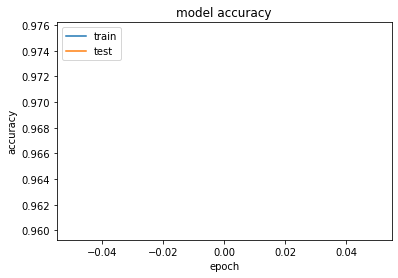

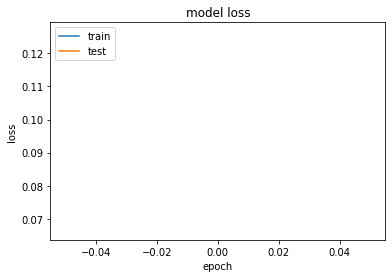

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [ ]:
#show_history(history)

NameError: ignored

In [ ]:
model_drop = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(36, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 2
    tf.keras.layers.Conv2D(36, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 3
    tf.keras.layers.Conv2D(72, (3,3), activation = 'relu'),
    tf.keras.layers.Dropout( 0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 4
    tf.keras.layers.Conv2D(72, (3,3), activation = 'relu'),    
    tf.keras.layers.Dropout( 0.2), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # layer 5
    tf.keras.layers.Dense(84, activation = 'relu'),
    tf.keras.layers.Dropout( 0.2),
    # layer 6
    tf.keras.layers.Dense(3, activation='softmax')
    
])

In [ ]:
model_drop.summary()
model_drop.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_drop = model_drop.fit(train_gen, epochs=1, validation_data = val_gen, verbose = 1)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 36)      1008      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 36)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 36)      11700     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 36)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 72)        23400     
                                                                 
 dropout (Dropout)           (None, 52, 52, 72)       

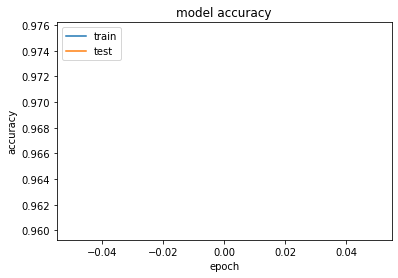

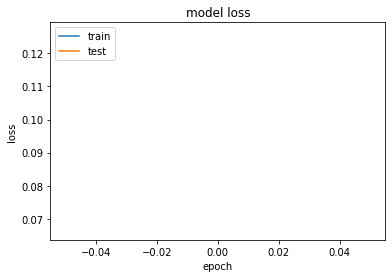

In [ ]:

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
